In [22]:
#https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html
import pandas as pd
from datetime import timedelta
path_data = '../Data/'
path_atmosphere = '/notebooks/workspace/precipitation/NCEP/npy/'
target_river='G'
if target_river == 'G':
    target = pd.read_csv(path_data+'Ganges.csv',index_col=3,header=0,parse_dates=True)
elif target_river == 'B':
    target = pd.read_csv(path_data+'Brahmaputra.csv',index_col=3,header=0,parse_dates=True)
else:
    target = pd.read_csv(path_data+'Meghna.csv',index_col=3,header=0,parse_dates=True)
dates = (target.Year > (1985-1)) & (target.Year<(2016+1))
target2 = target.loc[dates]
#print (target2)
#print(target2[:50])
dates = (target2.Month>5) & (target2.Month<10)
idx = dates[1:]

#print(target2.index[:50])
print(dates[:160])
print(idx[:160])
#date_index = np.load(path_atmosphere+'time.npy')[:25538]
#target2 = target2.reset_index()
#target2.index = target2.index - timedelta(15)
#print(target2.index[:50])
#print(list(target2))



Date
1985-01-01    False
1985-01-02    False
1985-01-03    False
1985-01-04    False
1985-01-05    False
1985-01-06    False
1985-01-07    False
1985-01-08    False
1985-01-09    False
1985-01-10    False
1985-01-11    False
1985-01-12    False
1985-01-13    False
1985-01-14    False
1985-01-15    False
1985-01-16    False
1985-01-17    False
1985-01-18    False
1985-01-19    False
1985-01-20    False
1985-01-21    False
1985-01-22    False
1985-01-23    False
1985-01-24    False
1985-01-25    False
1985-01-26    False
1985-01-27    False
1985-01-28    False
1985-01-29    False
1985-01-30    False
              ...  
1985-05-11    False
1985-05-12    False
1985-05-13    False
1985-05-14    False
1985-05-15    False
1985-05-16    False
1985-05-17    False
1985-05-18    False
1985-05-19    False
1985-05-20    False
1985-05-21    False
1985-05-22    False
1985-05-23    False
1985-05-24    False
1985-05-25    False
1985-05-26    False
1985-05-27    False
1985-05-28    False
1985-05-29    F

In [4]:
lat0 = (int)((80-max_latitude)/2.5)
lat1 = (int)((80-min_latitude)/2.5)
lon0 = (int)(min_longitude/2.5)
lon1 = (int)(max_longitude/2.5)
print (lat1-lat0)
print (lon1-lon0)

11
10


102.61814162770256
36033153816.3181
452.2025899418065


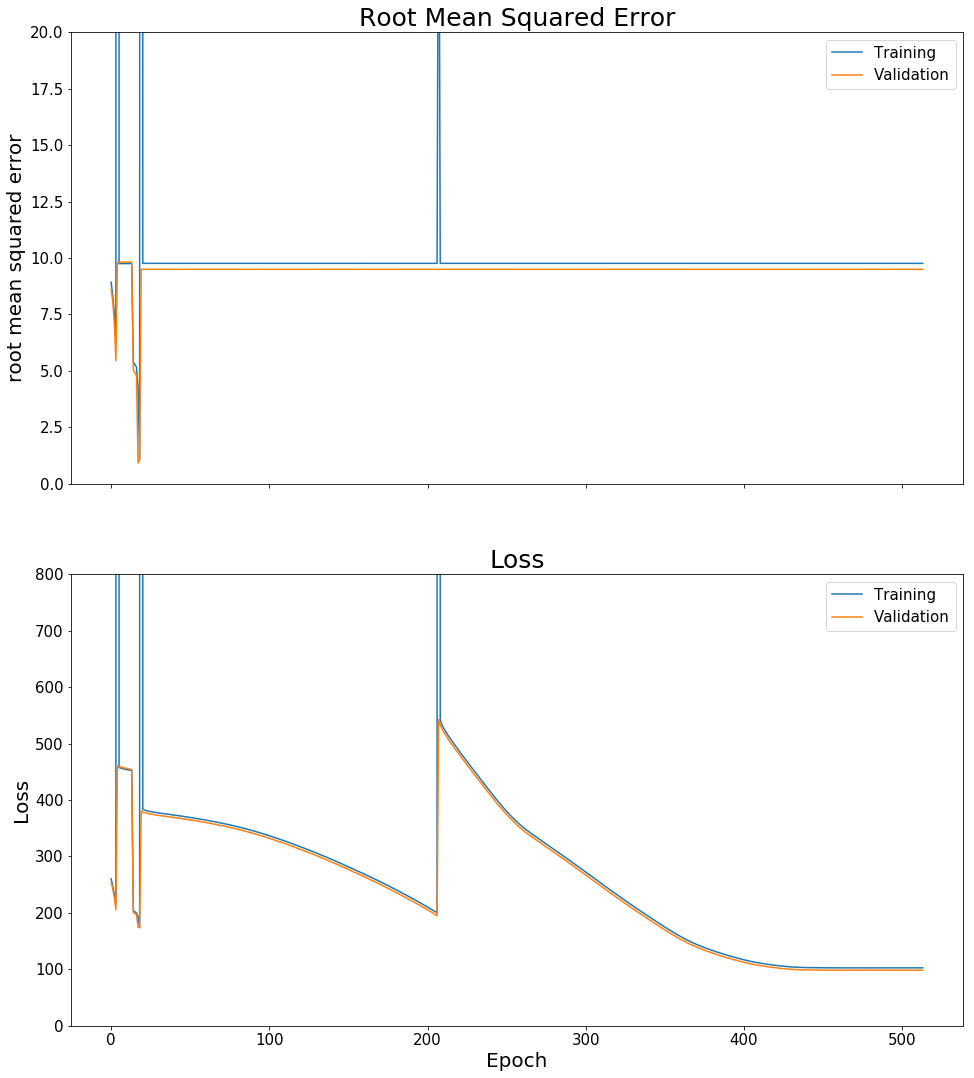

In [72]:
import cPickle as pickle
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
f = open(r"RET/y20data10model1.lr0.01.resunit8.normal1.history.pkl", "rb")
his1 = pickle.load(f)#c15.resunit4.lr0.011.history.pkl
kk = len(his1['val_loss'])
f = open(r"RET/y20data10model1.lr0.01.resunit8.normal1.cont.history.pkl", "rb")
his2 = pickle.load(f)

history= {}
for k,v in his1.iteritems():
    history[k]=np.append(his1[k],his2[k])   

# summarize history for root mean squared error
f, (ax1,ax2) = plt.subplots(2, 1, sharex=True)
f.set_size_inches(16, 8)
f.subplots_adjust(top=1.85)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_title('Root Mean Squared Error',size=25)
ax1.set_ylabel('root mean squared error',size=20)
ax1.set_ylim(0,20)
#ax1.set_xlabel('epoch',size=20)
rmse_train=ax1.plot(history['rmse'][1:])
rmse_val=ax1.plot(history['val_rmse'][1:])
ax1.legend( ( rmse_train[0], rmse_val[0]), ('Training','Validation'),fontsize=15)



ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.set_title('Loss',size=25)
ax2.set_ylabel('Loss',size=20)
ax2.set_xlabel('Epoch',size=20)
ax2.set_ylim(0,800)
loss_train=ax2.plot(history['loss'][1:])
loss_val=ax2.plot(history['val_loss'][1:])
print (np.min(history['loss']))
print (np.max(history['loss']))
print (history['loss'][kk-1])

ax2.legend( ( loss_train[0], loss_val[0]), ('Training','Validation'),fontsize=15)
plt.show()

In [4]:
def distribution_plot(y):
    overall_min = np.min(y)
    overall_max = np.max(y)
    #print (overall_max,overall_min)
    bins = np.linspace(overall_min, overall_max, 50)
    #print(bins)   
    fig = plt.figure()
    fig.set_size_inches(15, 10)
    print (y.shape)  
    n, bins, patches = plt.hist(y, bins, alpha=0.5, density=True, facecolor='g')#log=True
    plt.show()

In [98]:
p = open(r"RET/y20data10model1.lr0.01.resunit8.normal1.cont.test_prediction.pkl", "rb")
prediction = pickle.load(p)

In [99]:
print (np.max(prediction))
print (np.min(prediction))
print (np.mean(prediction))
print (prediction[:50])

0.0
0.0
0.0
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [50]:
def get_streamflow(target_river,dayN,day0): #G,B,M
    if target_river == 'G':
        target = pd.read_csv(data_path+'Ganges.csv',index_col=3,header=0,parse_dates=True)
    elif target_river == 'B':
        target = pd.read_csv(data_path+'Brahmaputra.csv',index_col=3,header=0,parse_dates=True)
    else:
        target = pd.read_csv(data_path+'Meghna.csv',index_col=3,header=0,parse_dates=True)
    dates = (target.Year > (start_year-1)) & (target.Year<(end_year+1))
    target2 = target[dates]
    #print (target2)
    #print(target2[:50])
    dates = (target2.Month>5) & (target2.Month<10)
    target2 = target2.loc[dates]
    #print(target2.index[:50])
    #target2 = target2.reset_index()
    #target2.index = target2.index - timedelta(15)
    #print(target2.index[:50])
    #print(list(target2))
    frame = pd.DataFrame(target2['Q (m3/s)'])
    frame.columns = ['Q']
    for lag in np.arange(dayN,day0+1):
        x = target.loc[target2.index - timedelta(lag), 'Q (m3/s)' ]
        x = pd.DataFrame(x)
        x.columns = [''.join(['Q_',str(lag)])]   
        x.index = frame.index
        frame = pd.concat([frame,x],axis=1)
    frame.to_csv(data_path+'dframe.csv')
    return frame,target2

In [103]:
from datetime import timedelta
data_path = '../Data/'
start_year = 1985
end_year = 2016
year_test = 2005
frame,target2 = get_streamflow('G',15,20) 
Y = frame.Q
Y = np.log(1+Y)
train_idx  = target2.Year < year_test
test_idx  = target2.Year >= year_test
Y_train, Y_test=Y[train_idx],Y[test_idx]

In [93]:
print (Y_train.shape)
print (np.max(Y_train))
print (np.min(Y_train))
print (np.mean(Y_train))
print (Y_train[:50])

(2440,)
11.277962336850676
6.415767765227459
9.700126121931891
Date
1985-06-01    6.887553
1985-06-02    6.908755
1985-06-03    7.013016
1985-06-04    7.139660
1985-06-05    7.333676
1985-06-06    7.421178
1985-06-07    7.403061
1985-06-08    7.390799
1985-06-09    7.340187
1985-06-10    7.259116
1985-06-11    7.186144
1985-06-12    7.131699
1985-06-13    7.115582
1985-06-14    7.155396
1985-06-15    7.178545
1985-06-16    7.193686
1985-06-17    7.237778
1985-06-18    7.266129
1985-06-19    7.300473
1985-06-20    7.327123
1985-06-21    7.409136
1985-06-22    7.534228
1985-06-23    7.630947
1985-06-24    7.701200
1985-06-25    7.762596
1985-06-26    7.779467
1985-06-27    7.796058
1985-06-28    7.816417
1985-06-29    7.882692
1985-06-30    7.951911
1985-07-01    8.049108
1985-07-02    8.188967
1985-07-03    8.380457
1985-07-04    8.643121
1985-07-05    8.762646
1985-07-06    8.794976
1985-07-07    8.801018
1985-07-08    8.860925
1985-07-09    8.943898
1985-07-10    9.051462
1985-07-11  

In [104]:
Y_test = Y_test.values
print (Y_test.shape)
print (np.max(Y_test))
print (np.min(Y_test))
print (np.mean(Y_test))
print (Y_test[:50])
pred = np.zeros(Y_test.shape[0])
s = np.square(np.subtract(Y_test,pred))
mse = np.mean(s)
print (mse)

(1464,)
10.926891263606484
6.703188113240863
9.48924248421657
[ 7.12849595  7.13489085  7.1538338   7.1861443   7.21964204  7.25205395
  7.26822302  7.3125535   7.44366368  7.51697722  7.52131798  7.47250074
  7.3524411   7.25347038  7.21964204  7.14124512  7.10824414  7.09920174
  7.09090982  7.13329595  7.15461536  7.19518732  7.35051617  7.62851763
  8.16108951  8.37586002  8.46294818  8.38617293  8.34735341  8.34212526
  8.32239411  8.31360714  8.30548402  8.33854488  8.39049554  8.46400336
  8.59118687  8.83898679  9.1406687   9.63390732 10.02428825 10.30189448
 10.44969962 10.47183652 10.47641435 10.43743382 10.40256443 10.35780631
 10.34106483 10.32508844]
91.29315560240478


distribution_plot(Y_test)
distribution_plot(prediction)